In [1]:
# CSS style setting
!wget http://bit.ly/3ZLyF82 -O CSS.css -q
    
from IPython.core.display import HTML
with open('./CSS.css', 'r') as file:
    custom_css = file.read()

HTML(custom_css)

## Prepare data
### import Toolkits

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor , plot_tree
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder

In [3]:
df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Explore

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

as it seems there is no null values in our data, but what about duplicated!!! let`s see

In [5]:
df.duplicated().sum()
# There is no duplicated Values..

0

#### Let`s show the distrbution of the data

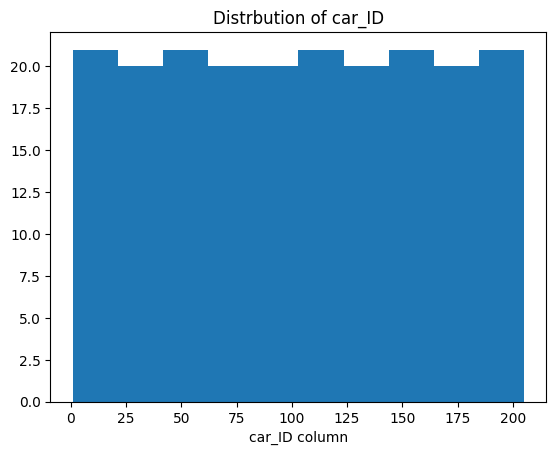

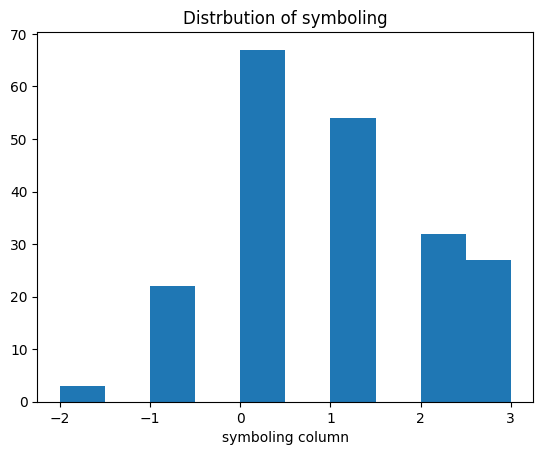

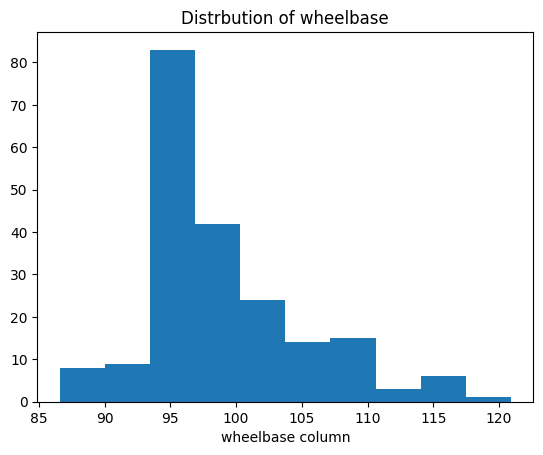

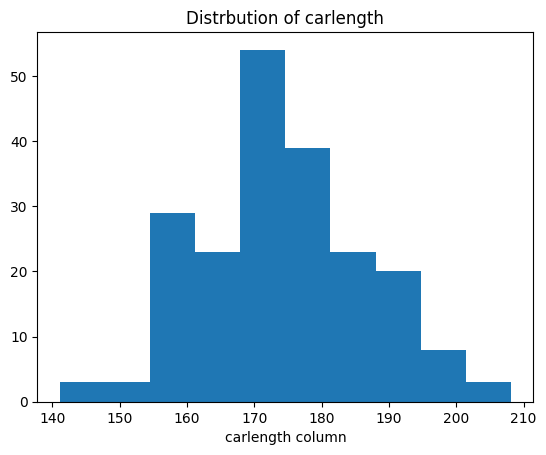

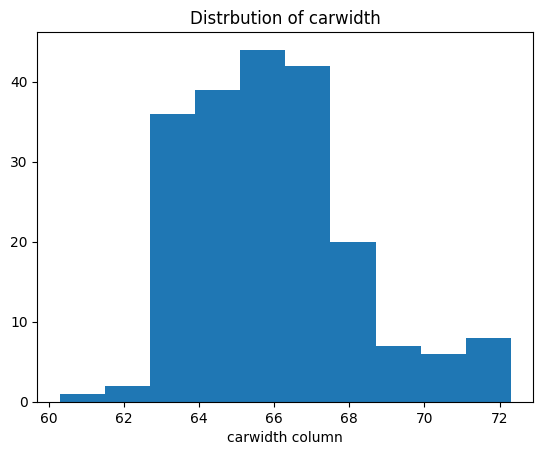

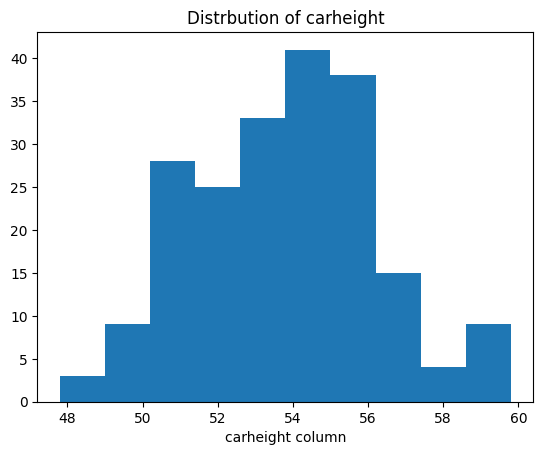

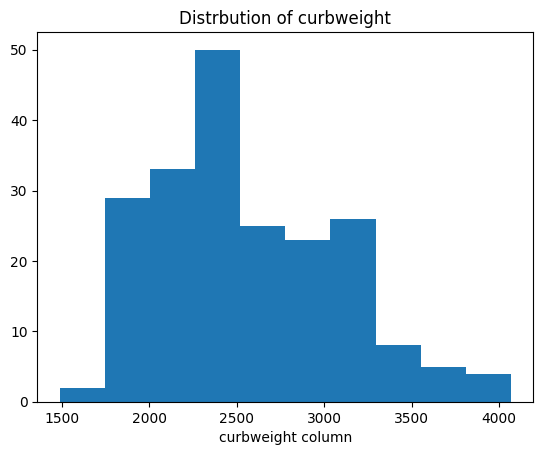

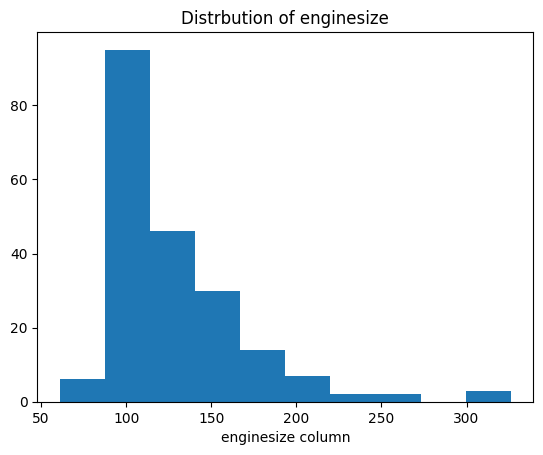

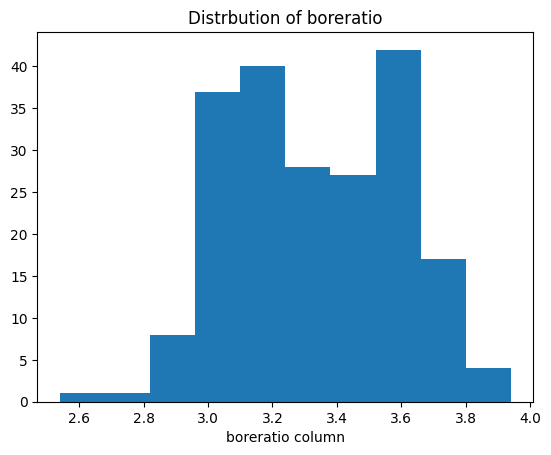

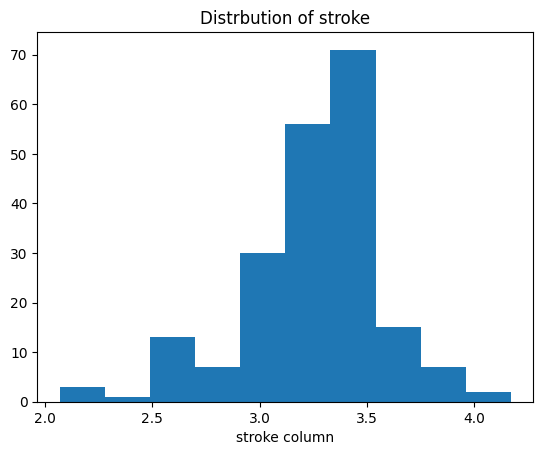

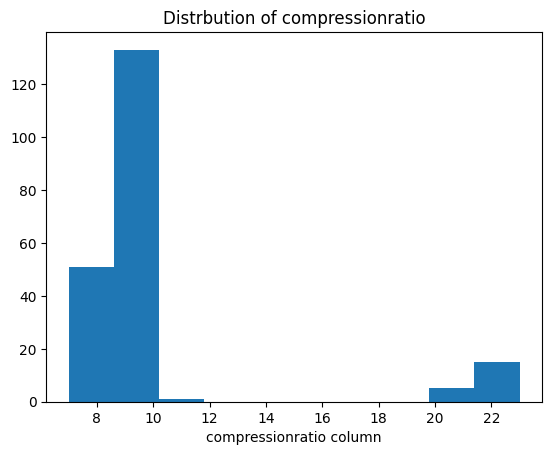

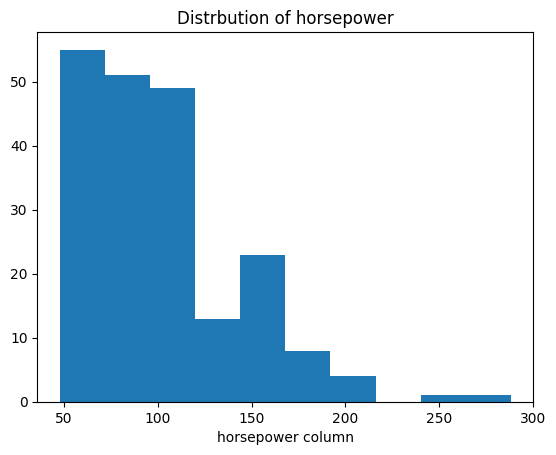

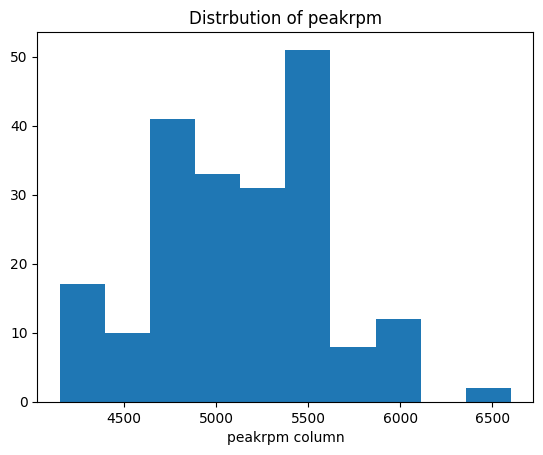

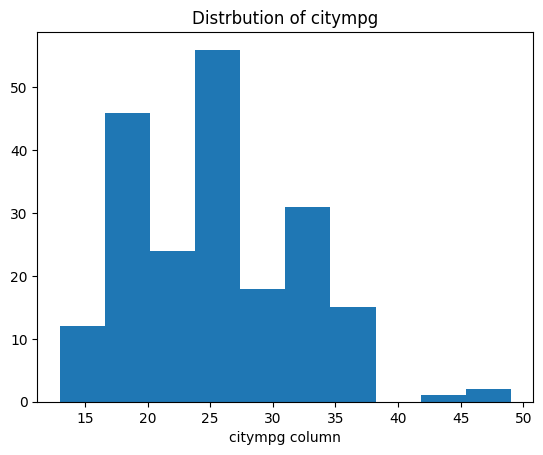

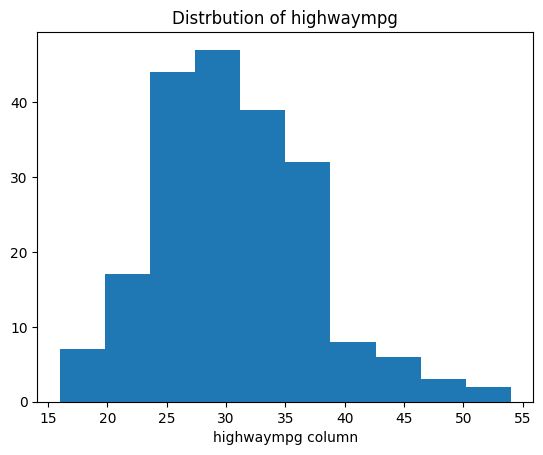

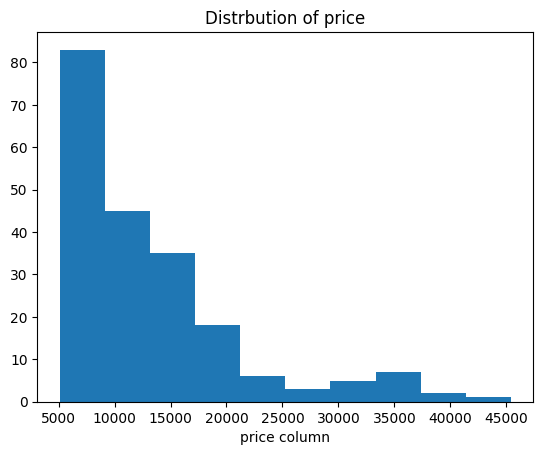

In [6]:
num_col= df.select_dtypes(exclude='object')
for i in num_col:
    plt.hist(df[i])
    plt.title(f'Distrbution of {i}')
    plt.xlabel(f'{i} column')
    plt.show()
# we will remove car_ID column later     

#### We will show the top 10 price carName

In [7]:
df_sorted= df.sort_values(by= 'price', ascending= False)
top10 = df_sorted.head(10)
top10

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
127,128,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028.0


In [8]:
fig = px.bar(data_frame= top10 , x= 'CarName' , y= 'price')
fig.update_layout(title= 'Top 10 Price Car Models', xaxis_title= 'Car Names' , yaxis_title= 'Price')
fig.show();

In [9]:
top10['fueltype'].value_counts()
# as we see the 10 most expensive cars working with gas

fueltype
gas    10
Name: count, dtype: int64

In [10]:
top10['aspiration'].value_counts()

aspiration
std    10
Name: count, dtype: int64

In [11]:
top10['doornumber'].value_counts()

doornumber
two     6
four    4
Name: count, dtype: int64

In [12]:
top10['drivewheel'].value_counts()

drivewheel
rwd    10
Name: count, dtype: int64

In [13]:
top10['enginelocation'].value_counts()

enginelocation
front    8
rear     2
Name: count, dtype: int64

did you think that the 10 cheapest cars working with turbo? let`s show that:)

In [14]:
lowest10 = df_sorted.tail(10)
lowest10

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
51,52,1,maxda glc deluxe,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.00,68,5000,31,38,6095.0
118,119,1,plymouth fury iii,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.40,68,5500,37,41,5572.0
21,22,1,dodge rampage,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.41,68,5500,37,41,5572.0
89,90,1,Nissan versa,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.40,69,5200,31,37,5499.0
32,33,1,honda civic,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.10,60,5500,38,42,5399.0
76,77,2,mitsubishi mirage,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.40,68,5500,37,41,5389.0
150,151,1,toyota corona mark ii,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.00,62,4800,35,39,5348.0
50,51,1,maxda rx3,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.00,68,5000,30,31,5195.0
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.50,48,5100,47,53,5151.0
138,139,2,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.00,69,4900,31,36,5118.0


In [15]:
fig = px.bar(data_frame= lowest10 , x= 'CarName' , y= 'price')
fig.update_layout(title= 'The cheapest 10 Price Car Models', xaxis_title= 'Car Names' , yaxis_title= 'Price')
fig.show();

In [16]:
lowest10['fueltype'].value_counts()
# as we see the 10 cheapest cars working with gas too

fueltype
gas    10
Name: count, dtype: int64

In [17]:
lowest10['aspiration'].value_counts()

aspiration
std    10
Name: count, dtype: int64

In [18]:
lowest10['doornumber'].value_counts()

doornumber
two    10
Name: count, dtype: int64

In [19]:
lowest10['drivewheel'].value_counts()

drivewheel
fwd    10
Name: count, dtype: int64

In [20]:
lowest10['enginelocation'].value_counts()

enginelocation
front    10
Name: count, dtype: int64

## Low & High cardenality

In [21]:
df.select_dtypes('object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [22]:
obj_col = df.select_dtypes('object')
for i in obj_col:
    print(i)
    print(df[i].nunique())
    print(df[i].unique())

CarName
147
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick

Let`s remove low & high cardinality such as [CarName,fueltype, aspiration, doornumber, enginelocation, drivewheel]

In [23]:
#we will remove car_ID as well
df.drop(columns= ['CarName','fueltype', 'aspiration', 'doornumber', 'enginelocation','car_ID'], inplace= True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   carbody           205 non-null    object 
 2   drivewheel        205 non-null    object 
 3   wheelbase         205 non-null    float64
 4   carlength         205 non-null    float64
 5   carwidth          205 non-null    float64
 6   carheight         205 non-null    float64
 7   curbweight        205 non-null    int64  
 8   enginetype        205 non-null    object 
 9   cylindernumber    205 non-null    object 
 10  enginesize        205 non-null    int64  
 11  fuelsystem        205 non-null    object 
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    int64  
 16  peakrpm           205 non-null    int64  
 1

In [25]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [26]:
num_col= df.select_dtypes(exclude='object')
num_col

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [27]:
corr = num_col.drop(columns = 'price').corr()
corr

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201


let`s show our heatMap

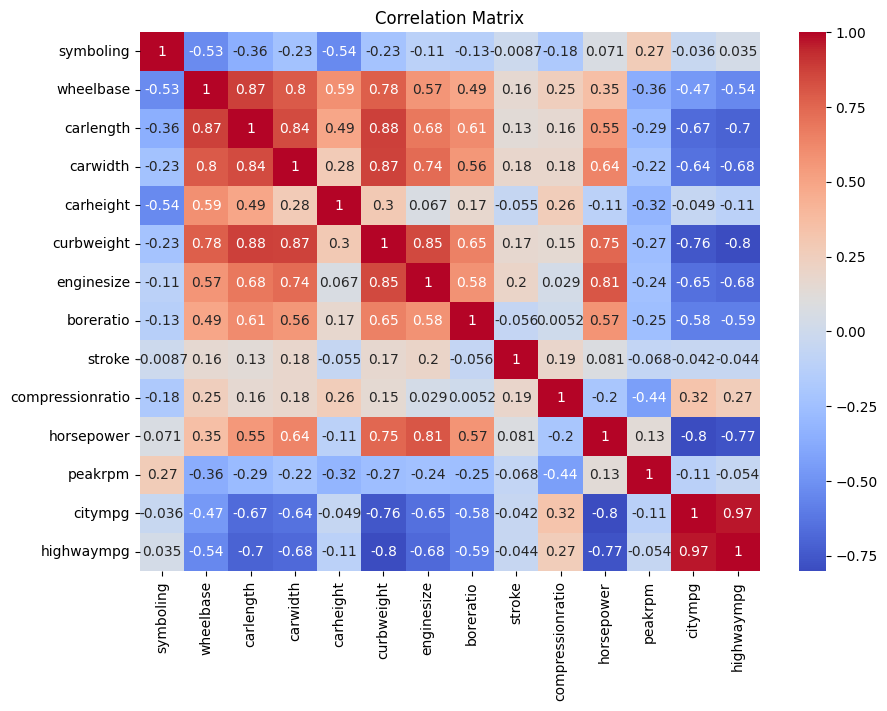

In [28]:
plt.figure(figsize= (10,7))
sns.heatmap(corr , annot= True , cmap= 'coolwarm')
plt.title('Correlation Matrix');

we have many high correlated features and as we see before there are some features that have right or left skewed
i think we can try decision tree

## Split

In [29]:
target = 'price'
x = df.drop(target , axis= 1)
y = df[target]

print("x shape ",x.shape)
print("y shape ",y.shape)

x shape  (205, 19)
y shape  (205,)


In [30]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.2 , random_state= 42)
print(f"x_train shape {x_train.shape}")
print(f"x_test shape {x_test.shape}")
print(f"y_train shape {y_train.shape}")
print(f"y_test shape {y_test.shape}")

x_train shape (164, 19)
x_test shape (41, 19)
y_train shape (164,)
y_test shape (41,)


# Build Model

## Baseline

In [31]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
print("mean price",y_mean)
print("Baseline MAE",mean_absolute_error(y_train , y_pred_baseline))

mean price 13223.414634146342
Baseline MAE 5770.955829863177


## Iterate

In [32]:
for i in range(2,11):
    model_reg= make_pipeline(OneHotEncoder(use_cat_names= True) 
                         , DecisionTreeRegressor(max_depth= i , random_state= 42)
                        )
    model_reg.fit(x_train , y_train)
    y_pred_training = model_reg.predict(x_train)
    y_pred_test = model_reg.predict(x_test)
    print('Max Depth =',i)
    print("MAE For Training =",mean_absolute_error(y_train, y_pred_training))
    print("MAE For Test =",mean_absolute_error(y_test, y_pred_test))
    print("R2_Score For Training =",r2_score(y_train, y_pred_training))
    print("R2_Score For Test =",r2_score(y_test, y_pred_test))

Max Depth = 2
MAE For Training = 2131.454645232816
MAE For Test = 2649.232498891352
R2_Score For Training = 0.8687580548084431
R2_Score For Test = 0.8474778872550113
Max Depth = 3
MAE For Training = 1651.6616032381162
MAE For Test = 2543.690414739838
R2_Score For Training = 0.9165579399128451
R2_Score For Test = 0.8533086253045753
Max Depth = 4
MAE For Training = 1381.8237395590545
MAE For Test = 2234.370143399559
R2_Score For Training = 0.941284186916621
R2_Score For Test = 0.8700513654845494
Max Depth = 5
MAE For Training = 987.9310377809661
MAE For Test = 2111.37412338594
R2_Score For Training = 0.9653360176127065
R2_Score For Test = 0.8874910156838026
Max Depth = 6
MAE For Training = 746.4880995796032
MAE For Test = 2010.9720175605312
R2_Score For Training = 0.9804387338279147
R2_Score For Test = 0.8933034331782652
Max Depth = 7
MAE For Training = 507.95242450638796
MAE For Test = 1867.4630549748356
R2_Score For Training = 0.9885827566708176
R2_Score For Test = 0.9050512038068775
M

it seems the best depth for the tree is 8

In [33]:
model_reg= make_pipeline(OneHotEncoder(use_cat_names= True) 
                         , DecisionTreeRegressor(max_depth= 8 , random_state= 42)
                        )
model_reg.fit(x_train , y_train)
print("MAE For Training =",mean_absolute_error(y_train, y_pred_training))
print("R2_Score For Training =",r2_score(y_train, y_pred_training))

MAE For Training = 126.21646341463415
R2_Score For Training = 0.9981378357678566


## Evaluate

In [34]:
print("MAE For Test =",mean_absolute_error(y_test, y_pred_test))
print("R2_Score For Test =",r2_score(y_test, y_pred_test))

MAE For Test = 1911.0975528455285
R2_Score For Test = 0.9008625047878651


## Communicate

In [35]:
ohe = OneHotEncoder(use_cat_names= True)
xt_train = ohe.fit_transform(x_train)
print(xt_train.shape)

(164, 43)


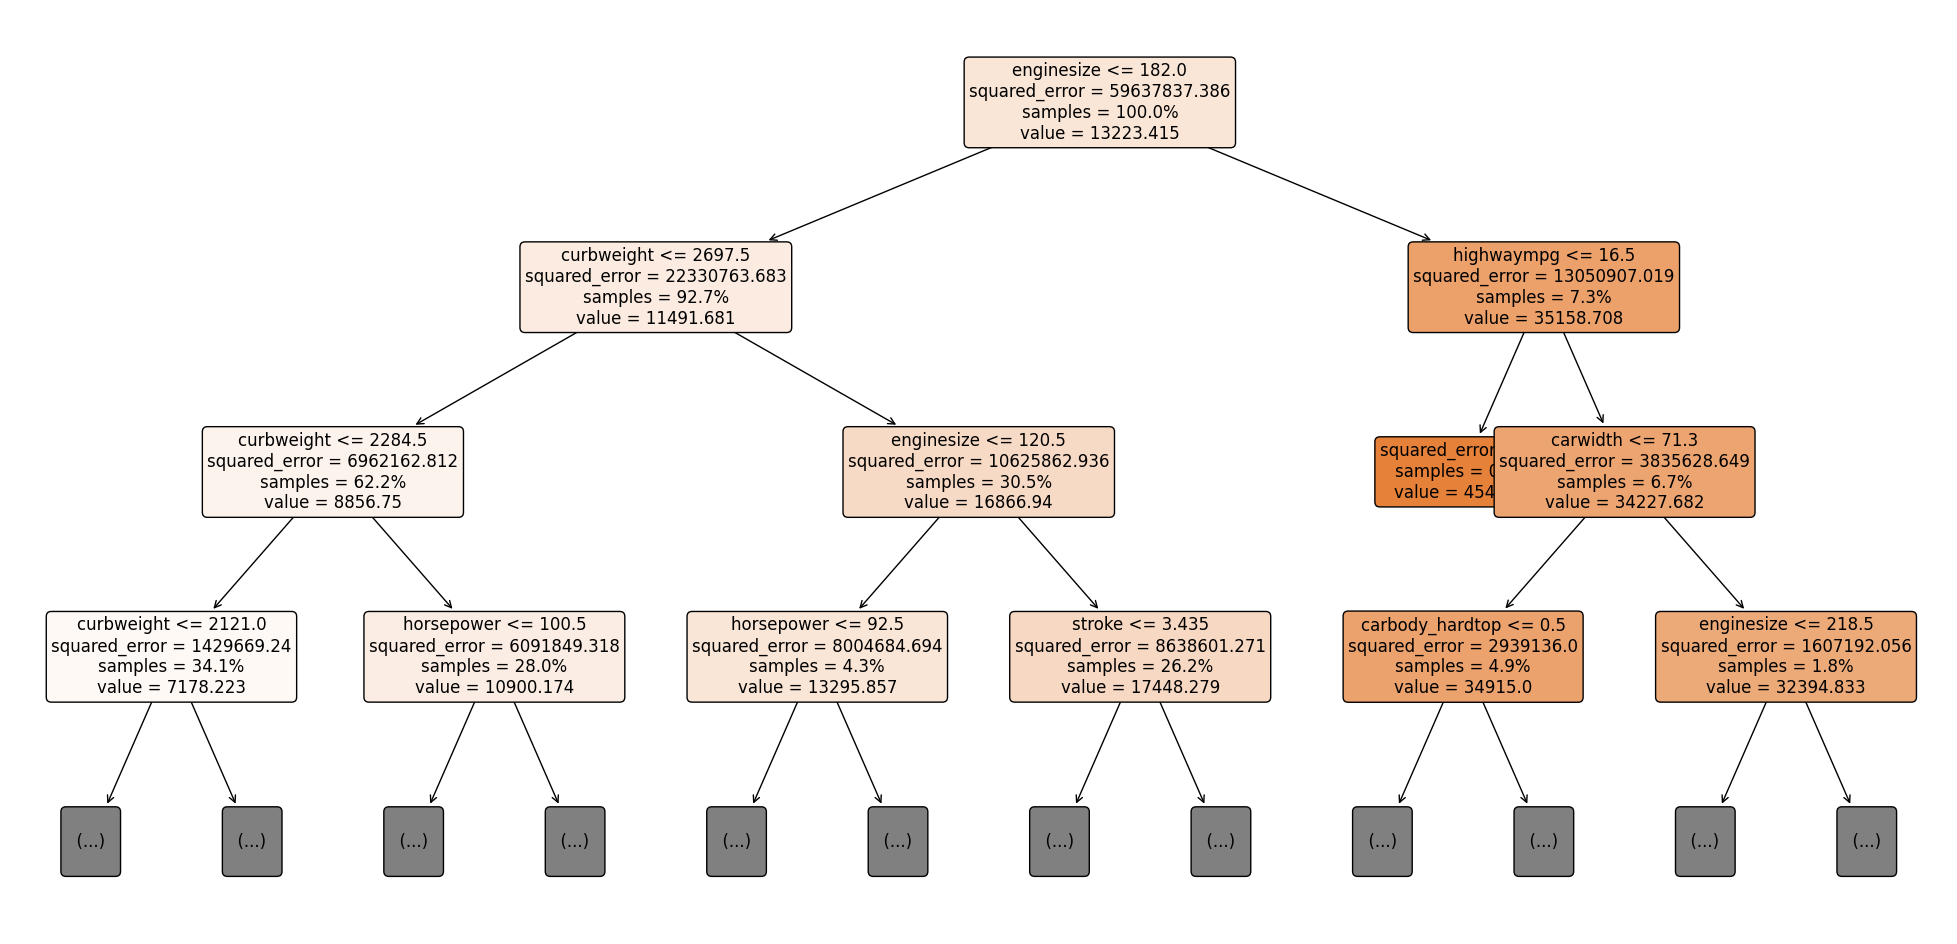

In [36]:
fig , ax = plt.subplots(figsize= (25,12))

#plot tree

plot_tree(
    decision_tree= model_reg.named_steps['decisiontreeregressor'],
    feature_names= xt_train.columns,
    filled= True,
    rounded = True,
    proportion = True,
    max_depth = 3,
    fontsize = 12,
    ax=ax
);

In [38]:
features = xt_train.columns
importances = model_reg.named_steps['decisiontreeregressor'].feature_importances_
print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['symboling', 'carbody_sedan', 'carbody_wagon'], dtype='object')
Importances: [6.26044932e-05 3.74023431e-06 0.00000000e+00]


In [40]:
feat_imp = pd.Series(importances , index = features).sort_values()
feat_imp.tail()

highwaympg    0.013774
horsepower    0.015692
stroke        0.016145
curbweight    0.266324
enginesize    0.652217
dtype: float64

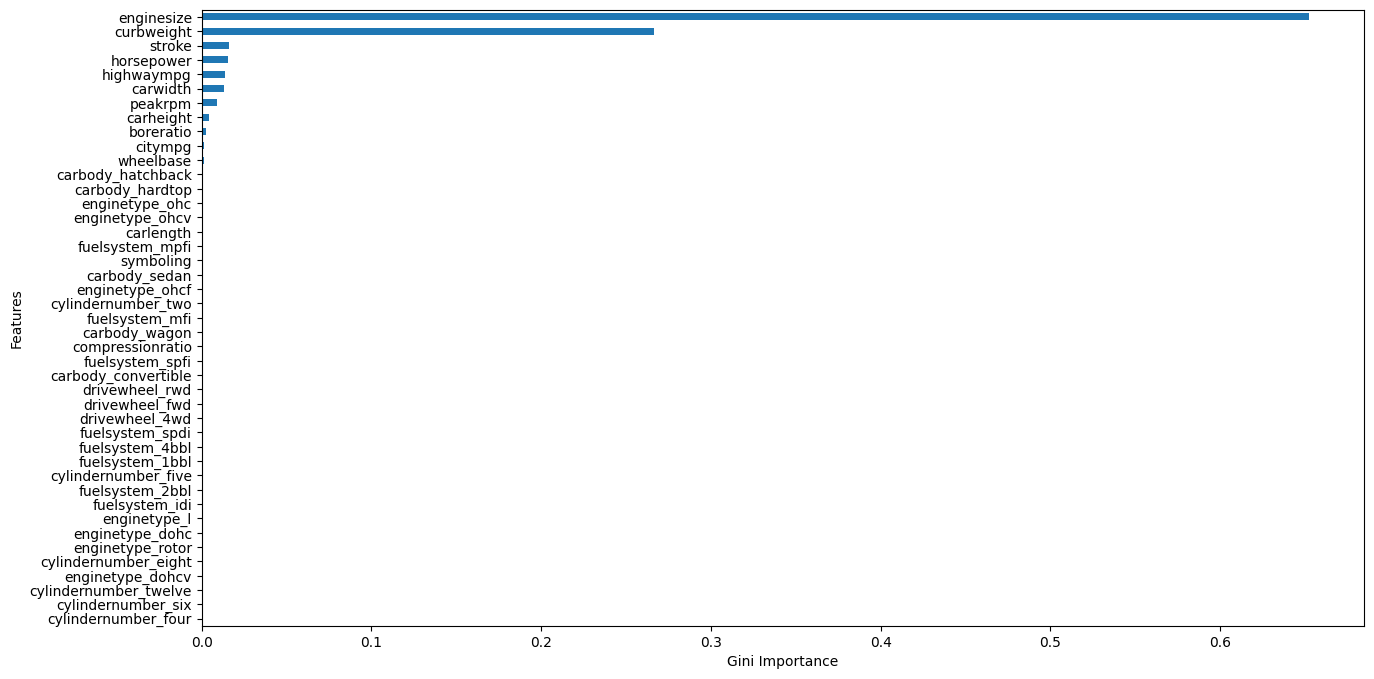

In [45]:
plt.figure(figsize= (15,8))
feat_imp.plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Features");